### [공공데이터 분석 - 온도 데이터]
- 데이터: 기상청 사이트

[1] 모듈 로딩 및 데이터 준비 <hr>

In [2022]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2023]:
FILE_NAME = '../DATA/대구_온도_20_25.csv'
dataDF = pd.read_csv(FILE_NAME, skiprows=7)
print(dataDF.head())

           날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  2020-10-01  143     18.4     12.8     24.9
1  2020-10-02  143     20.7     14.4     26.6
2  2020-10-03  143     21.5     17.6     27.3
3  2020-10-04  143     20.3     17.0     23.1
4  2020-10-05  143     15.8     11.0     20.1


[2] 데이터 확인 <hr>

In [2024]:
# 요약 정보
dataDF.info()

# 날짜 컬럼 앞부분 '\t' 공백 제거
# 지점 컬럼 대구코드값 불필요한 컬럼 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       1866 non-null   object 
 1   지점       1866 non-null   int64  
 2   평균기온(℃)  1866 non-null   float64
 3   최저기온(℃)  1866 non-null   float64
 4   최고기온(℃)  1865 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 73.0+ KB


[3] 기본 전처리 => 불필요한 컬럼, 데이터 삭제 <hr>

In [2025]:
# 불필요한 컬럼 제거
dataDF.drop(columns = '지점', inplace = True)
display(dataDF)

# 날짜 컬럼 앞에 붙은 '\t' 제거 -> 날짜 컬럼 타입 object로 str
dataDF['날짜'] = dataDF['날짜'].str.strip()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2020-10-01,18.4,12.8,24.9
1,2020-10-02,20.7,14.4,26.6
2,2020-10-03,21.5,17.6,27.3
3,2020-10-04,20.3,17.0,23.1
4,2020-10-05,15.8,11.0,20.1
...,...,...,...,...
1861,2025-11-05,11.8,5.4,20.2
1862,2025-11-06,12.8,6.7,21.2
1863,2025-11-07,13.1,7.7,20.6
1864,2025-11-08,12.9,7.8,18.3


[3] 세부 전처리 <hr> => 결측치/중복값/이상치

In [2026]:
# 결측치 확인 및 제거
dataDF.isnull().sum()   # 결측치 확인
# 결측치 존재 행 추출 -> 필터링(만약에 컬럼별로 결측치가 여러개면 OR 연산자로 print)
# 방법 1)
# ex) print(dataDF[dataDF['최고기온(℃)'].isnull() == True] | dataDF[dataDF['평균기온(℃)'].isnull() == True]) 
print(dataDF[dataDF['최고기온(℃)'].isnull() == True])
msDF = dataDF[dataDF['최고기온(℃)'].isnull() == True]

# 방법 2)
# any(): 행/열 방향으로 원소가 1개 이상(1개라도 True면 True)
# all(): 행/열 방향으로 원소가 모두 True면 True
# ★ 주의 ★
# -> 행 단위일 경우 aixs=1: 행을 구성하는 모든 원소 즉, 모든 컬럼값을 확인
# -> 열 단위일 경우 axis=0: 열을 구성하는 모든 원소 즉, 모든 행의 값들 확인
# print(dataDF[dataDF.isnull().any(axis=1)]) 

# print(dataDF.iloc[1238][dataDF.iloc[1238].isnull()].index)

# 데이터의 특성 즉, 기온 무작위성 X => 같은 컬럼의 값들이 서로 연결성
# 삭제하기 말고 채우기 => 이전/이후값들의 평균값으로 채우기
for idx in msDF.index:

    # 결측치인 행만 추출
    cols = dataDF.iloc[1238][dataDF.iloc[1238].isnull()].index

    # 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균: {컬럼명:평균값,...}
    fill_values = dataDF[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    dataDF.loc[idx] = dataDF.iloc[idx].fillna(fill_values)

# 결측치 대체 확인
print(dataDF.isnull().sum())

# 중복값 체크
# subset 방법)
duDF = dataDF.duplicated(subset = dataDF.columns[1:], keep=False)
# print(f'중복값 체크: {dataDF[duDF]}')
# print(dataDF.sort_values(by=['평균기온(℃)']))

              날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
1238  2024-02-21      5.1      3.6      NaN
날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64


In [2027]:
# 이상치 체크
import sys
sys.path.append(r'C:\Users\khw27\바탕 화면\SL_KDT_10\04_ANALYSIS\Utils')
import datautil as du

# 수치컬럼의 이상치 검사
numeric_cols = dataDF.select_dtypes(include='number')
du.get_outlier_records(dataDF, numeric_cols)

# du.get_outlier_records(dataDF, dataDF.columns[1:])

[]

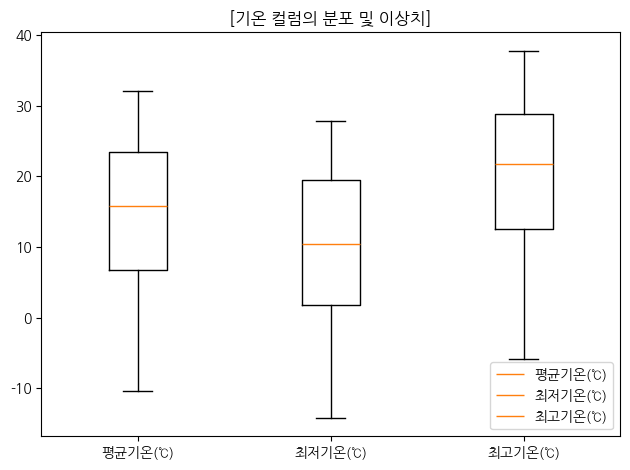

In [2028]:
# 컬럼별 이상치 Boxplot 체크

data_name = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

plt.boxplot(dataDF[data_name], label=data_name, notch=False)


## 그래프 공통 요소
plt.title('[기온 컬럼의 분포 및 이상치]')

plt.legend()

plt.xticks([1,2,3], data_name)  

plt.tight_layout()
## 그래프 화면 출력
plt.show()

[4] 탐색적 분석(EDA) <hr>

### 전체적인 대구시의 2000.1.1 ~ 2025.11.9까지 기온변화
### => 시간에 따른 흐름: 선그래프
### => X축: 날짜        Y축: 기온 평균/최저/최고

In [2029]:
# ---------------------------------------------------
# 날짜 컬럼 일단위 ===> 주기 (주 W, 월 M, 분기 Q, 년도 Y)
# ---------------------------------------------------
# Period 배열 만들기
pr_m = pd.period_range(start = dataDF['날짜'].iloc[0],   # 날짜 범위의 시작
                       end = dataDF['날짜'].iloc[-1],    # 날짜 범위의 끝
                       freq = 'Y')                      # 주기 설정 

print(pr_m, pr_m.shape, range(1, pr_m.shape[0]+1))
print(pr_m[0], type(pr_m[0])) # period 타입

PeriodIndex(['2020', '2021', '2022', '2023', '2024', '2025'], dtype='period[Y-DEC]') (6,) range(1, 7)
2020 <class 'pandas._libs.tslibs.period.Period'>


In [2030]:
# 날짜 컬럼이 datetime인지 보장
# 문자열은 글자일 뿐이고, 그래프의 x축은 “숫자로 계산 가능한 시간”을 원합니다.
# pd.to_datetime을 쓰면 ‘글자 날짜’를 ‘진짜 시간’(datetime64)로 바꿉니다.
# x축이 진짜 시간이 되면, matplotlib가 날짜를 숫자로 변환해서 눈금/라벨을 알아서 처리할 수 있어 오류가 사라집니다.
# 즉, “글자 날짜 → 진짜 시간”으로 바꿨기 때문에, 그래프의 날짜 축 계산이 가능해져 TypeError가 없어졌습니다.

# 변환 전에는 날짜 컬럼 object 타입
print(dataDF.info(), '\n')


# 날짜 컬럼: object ==> str이지만 날짜를 의미 => datetime64[ns]로 변환을 해야 함
dataDF['날짜'] = pd.to_datetime(dataDF['날짜'])

# 변환 후 타입 체크
print(type(dataDF['날짜'][0]), '\n') # 날짜 원소 각각은 Timestamp
print(dataDF.info(), '\n')          # 날짜 컬럼 자체는 datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       1866 non-null   object 
 1   평균기온(℃)  1866 non-null   float64
 2   최저기온(℃)  1866 non-null   float64
 3   최고기온(℃)  1866 non-null   float64
dtypes: float64(3), object(1)
memory usage: 58.4+ KB
None 

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       1866 non-null   datetime64[ns]
 1   평균기온(℃)  1866 non-null   float64       
 2   최저기온(℃)  1866 non-null   float64       
 3   최고기온(℃)  1866 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 58.4 KB
None 



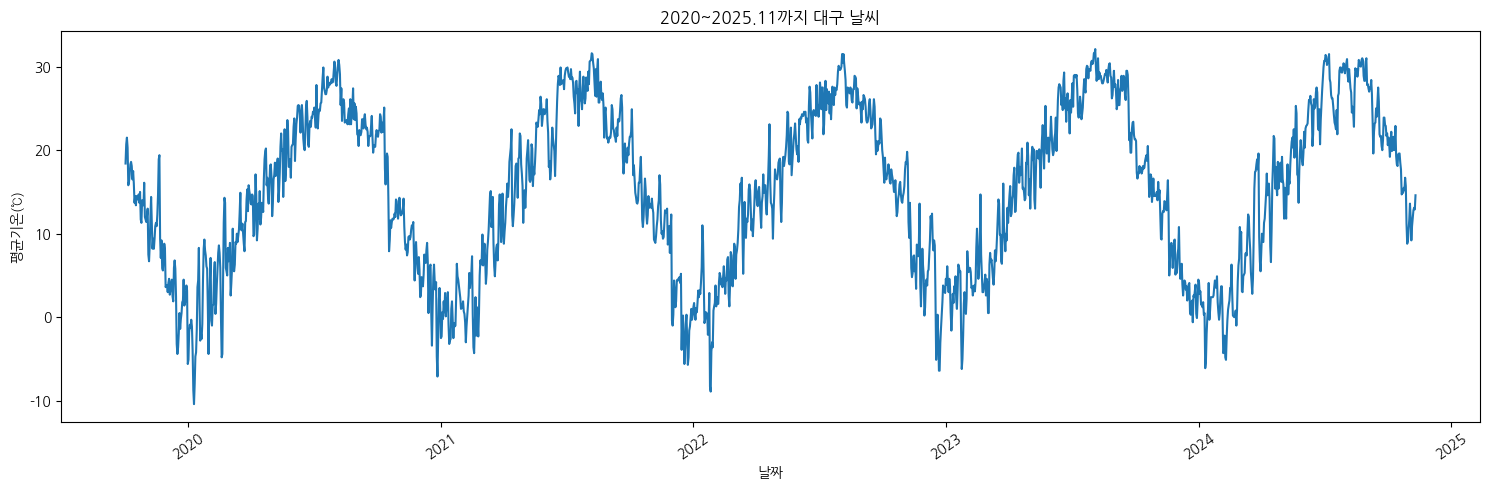

In [2031]:
# 시간에 따른 평균온도 흐름
plt.figure(figsize = (15, 5))
plt.plot(dataDF['날짜'], dataDF['평균기온(℃)'])

plt.title('2020~2025.11까지 대구 날씨')
plt.xlabel('날짜'); plt.ylabel('평균기온(℃)')

plt.xticks(pr_m, pr_m, rotation=35)     # 넣을 값, 지정한 라벨 값, 회전

plt.tight_layout()

plt.show()

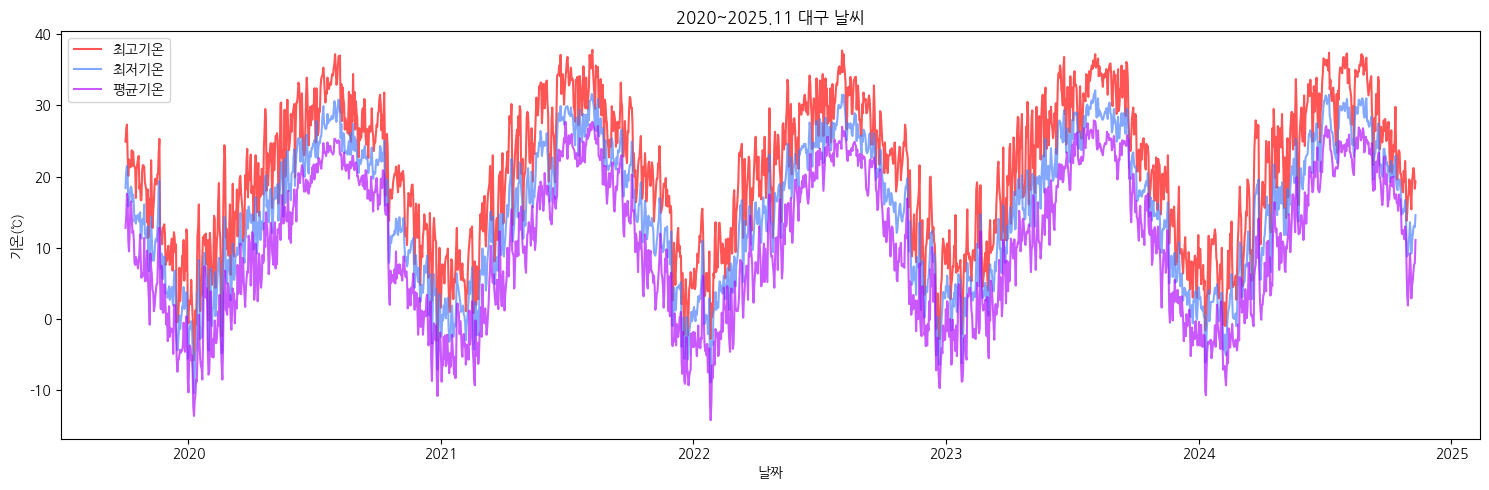

In [2032]:
# [문제] 2020~2025년도 최고온도/최저온도/평균온도 변화 시각화

dataDF['날짜'] = pd.to_datetime(dataDF['날짜'])

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(dataDF['날짜'], dataDF['최고기온(℃)'], label='최고기온', color="#ff0000aa")
ax.plot(dataDF['날짜'], dataDF['평균기온(℃)'], label='최저기온', color="#447cffa8")
ax.plot(dataDF['날짜'], dataDF['최저기온(℃)'], label='평균기온', color="#b006ffaa")

ax.set_title('2020~2025.11 대구 날씨')
ax.set_xlabel('날짜'); ax.set_ylabel('기온(℃)')

plt.xticks(pr_m, pr_m)

ax.legend()  
plt.tight_layout()

plt.show()

             날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도
0    2020-10-01     18.4     12.8     24.9  2020
1    2020-10-02     20.7     14.4     26.6  2020
2    2020-10-03     21.5     17.6     27.3  2020
3    2020-10-04     20.3     17.0     23.1  2020
4    2020-10-05     15.8     11.0     20.1  2020
...         ...      ...      ...      ...   ...
1861 2025-11-05     11.8      5.4     20.2  2025
1862 2025-11-06     12.8      6.7     21.2  2025
1863 2025-11-07     13.1      7.7     20.6  2025
1864 2025-11-08     12.9      7.8     18.3  2025
1865 2025-11-09     14.6     11.1     19.3  2025

[1866 rows x 5 columns]


,연도,최고기온,최저기온,평균기온
0,2020,27.3,-10.3,8.889130
1,2021,37.2,-13.6,14.661096
2,2022,37.8,-9.3,14.771233
3,2023,37.7,-14.2,15.175342
4,2024,37.2,-8.8,15.850000
5,2025,37.4,-10.7,16.781789


PeriodIndex(['2020', '2021', '2022', '2023', '2024', '2025'], dtype='period[Y-DEC]') (6,) range(1, 7)
2020 <class 'pandas._libs.tslibs.period.Period'>


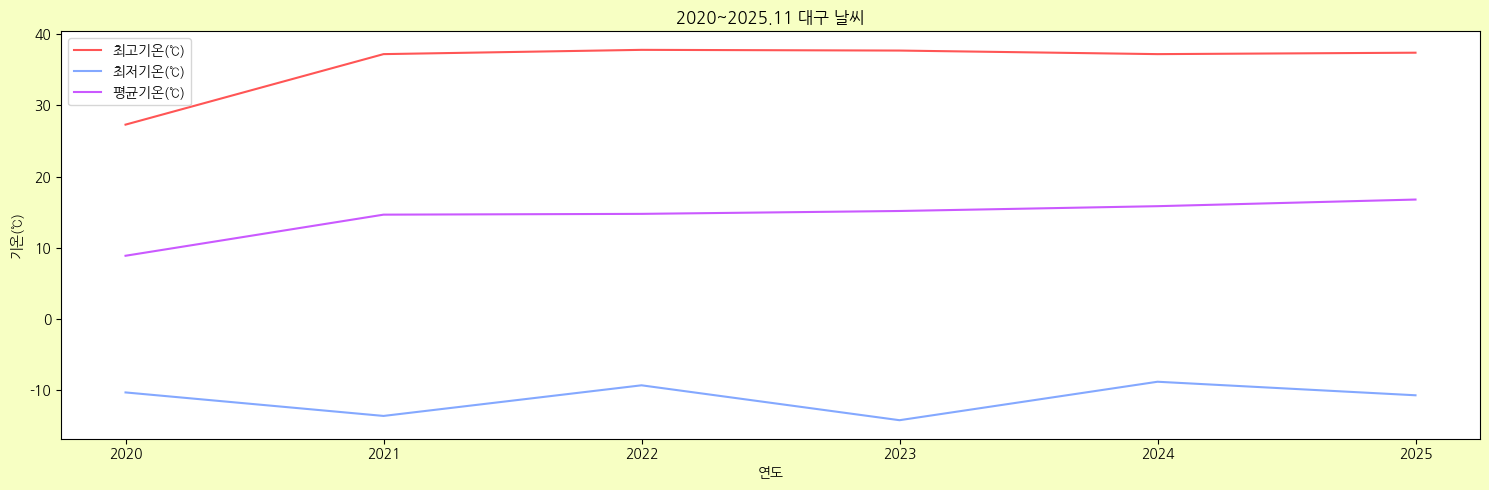

In [2034]:
# [문제] 2020~2025년도 최고온도/최저온도/평균온도 변화 시각화
print(dataDF)

# 연도 컬럼 추가
dataDF['연도'] = dataDF['날짜'].dt.year  # 연도 추출 

# agg 방법)
yearly = (dataDF.groupby('연도', as_index=False).agg(최고기온=('최고기온(℃)', 'max'),
                                                    최저기온=('최저기온(℃)', 'min'),
                                                    평균기온=('평균기온(℃)', 'mean')))


display(yearly)

# Period 배열 만들기 -------------------------------------------------------------------
pr_m2 = pd.period_range(start = yearly['연도'].iloc[0],   # 날짜 범위의 시작
                       end = yearly['연도'].iloc[-1],    # 날짜 범위의 끝
                       freq = 'Y')                      # 주기 설정 

print(pr_m2, pr_m2.shape, range(1, pr_m2.shape[0]+1))
print(pr_m2[0], type(pr_m2[0])) # period 타입
# -------------------------------------------------------------------------------------
# yearly['연도'] = pd.to_datetime(yearly['연도'])


fig, ax = plt.subplots(figsize=(15,5), facecolor="#f7ffc3")

ax.plot(yearly['연도'], yearly['최고기온'], label='최고기온(℃)', color="#ff0000aa")
ax.plot(yearly['연도'], yearly['최저기온'], label='최저기온(℃)', color="#447cffa8")
ax.plot(yearly['연도'], yearly['평균기온'], label='평균기온(℃)', color="#b006ffaa")

ax.set_title('2020~2025.11 대구 날씨')
ax.set_xlabel('연도'); ax.set_ylabel('기온(℃)')

plt.xticks(yearly['연도'], pr_m2)

ax.legend()  
plt.tight_layout()

plt.show()

In [ ]:
# [과제 1] 여름이 길어지고 겨울이 짧아짐 => 25도 이상인 일수(일별로 최고온도가 25도를 넘어가는 일수가 몇일 있는지)


# [과제 2] 대구지역의 인구/구별로
#         (1) 성별 인구 비율
#         (2) 투표 가능 인구
#         (3) 학령 인구

# - 질문 리스트